In [67]:
# Dependencies and Setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json

import time # use for annotating the date of the API pull in graphics using '.now'

import openbrewerydb # a wrapper for accessing the Open Brewery DB API

import gmaps
import gmaps.datasets

import gmaps.geojson_geometries

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

#config
from config import api_key

from pprint import pprint


#gmaps.configure(api_key=api_key)
# print(api_key) # comment out before saving or uploading to github

In [68]:
# Store filepath in a variable
file_one = "census_data_by_zip.csv"

In [69]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_one_df = pd.read_csv('census_data_by_zip.csv', dtype=str)
#file_one_df["postal_code"]=file_one_df["postal_code"].astype(str)
# Show just the header
file_one_df.head()

,postal_code,Population,Median Age,Household Income,Per Capita Income,Number of Males,Number of Females
0,08518,5217.0,41.5,74286.0,33963.0,2539.0,2678.0
1,08520,27468.0,37.4,90293.0,37175.0,14319.0,13149.0
2,08525,4782.0,47.1,118656.0,59848.0,2325.0,2457.0
3,08527,54867.0,42.2,88588.0,37021.0,26774.0,28093.0
4,08528,245.0,48.5,58676.0,49117.0,120.0,125.0


In [75]:
brewery_data_df = openbrewerydb.load(state=None)
brewery_data_df["postal_code"]= brewery_data_df["postal_code"].str.split("-", n = 1, expand = True) 
brewery_data_df

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,tag_list,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222,Alabama,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Tuscaloosa,United States,4,33.198491,-87.562155,Band of Brothers Brewing Company,2052665137,35401,Alabama,1605 23rd Ave,[],2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,micro,Birmingham,United States,44,33.512849,-86.791400,Trim Tab Brewing,2057030536,35233,Alabama,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,micro,Huntsville,United States,46,34.727752,-86.593201,Yellowhammer Brewery,2569755950,35805,Alabama,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,micro,Wasilla,United States,55,61.575269,-149.412710,Bearpaw River Brewing Co,,99654,Alaska,4605 E Palmer Wasilla Hwy,[],2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com
5,micro,Anchorage,United States,76,61.138489,-149.879076,King Street Brewing Co,9073365464,99515,Alaska,9050 King Street,[],2018-08-23T23:20:57.179Z,http://www.kingstreetbrewing.com
6,micro,Tucson,United States,94,32.246737,-110.992751,1912 Brewing,5202564851,85745,Arizona,2045 N Forbes Blvd Ste 105,[],2018-08-23T23:21:11.302Z,http://www.1912brewing.com
7,contract,Scottsdale,United States,98,33.497262,-111.924474,Bad Water Brewing,5207459175,85251,Arizona,4216 N Brown Ave,[],2018-08-23T23:21:15.169Z,http://www.badwaterbrewing.com
8,brewpub,Chandler,United States,104,33.305346,-111.911126,BJs Restaurant & Brewery - Chandler,4809170631,85226,Arizona,3155 W Chandler Blvd,[],2018-08-23T23:21:21.165Z,http://www.bjsrestaurants.com
9,micro,Tucson,United States,107,32.201608,-110.821779,BlackRock Brewers,5202073203,85710,Arizona,1664 S Research Loop Ste 200,[],2018-08-23T23:21:23.794Z,http://www.brb.beer


In [77]:
print(brewery_data_df.columns)

Index(['brewery_type', 'city', 'country', 'id', 'latitude', 'longitude',
       'name', 'phone', 'postal_code', 'state', 'street', 'tag_list',
       'updated_at', 'website_url'],
      dtype='object')


In [145]:
# Merge two dataframes using an inner join
merge_table = pd.merge(file_one_df, brewery_data_df, on="postal_code")
merge_table["Population"]=merge_table["Population"].astype(float)
merge_table["Median Age"]=merge_table["Median Age"].astype(float)
merge_table["Household Income"]=merge_table["Household Income"].astype(float)
merge_table.to_csv("Output/Joined_File_DB.csv", index=False, header=True)
merge_table.count()

postal_code          7884
Population           7884
Median Age           7884
Household Income     7884
Per Capita Income    7880
Number of Males      7884
Number of Females    7884
brewery_type         7884
city                 7884
country              7884
id                   7884
latitude             4725
longitude            4725
name                 7884
phone                7884
state                7884
street               7884
tag_list             7884
updated_at           7884
website_url          7884
dtype: int64

In [144]:
merge_table["Household Income"] = merge_table["Household Income"].map("${:,.2f}".format)

ValueError: Unknown format code 'f' for object of type 'str'

In [139]:
city_population = merge_table.groupby(["city"]).agg(
                            {"Population":sum, 
                             "Household Income":"mean",
                             "Median Age":"mean"})

city_population
                             
#city_population_index = city_population.reset_index()
#city_population_index = city_population_index.sort_values(["Population"], ascending = False)

#city_population_index

,Population,Household Income,Median Age
city,,,
Abbottstown,3501.0,6.160700e+04,4.070000e+01
Aberdeen,97196.0,4.518225e+04,3.792500e+01
Abilene,100198.0,4.461275e+04,3.300000e+01
Abingdon,16239.0,3.922900e+04,4.470000e+01
Abington,16009.0,7.839500e+04,3.870000e+01
Accord,3435.0,6.763900e+04,4.260000e+01
Acton,43608.0,1.095780e+05,4.190000e+01
Ada,19366.0,1.187610e+05,3.930000e+01
Adamstown,5805.0,7.352650e+04,4.085000e+01


In [130]:
#city_population = merge_table.groupby("city")["Population"].sum()
#city_population_index = city_population.reset_index()
#city_population_index = city_population_index.sort_values(["Population"], ascending = False)

#city_population_index
#number_breweries_index = number_breweries.reset_index()
#number_breweries_index.sort_values(["postal_code"], ascending = False)
#number_breweries_index.to_csv("Output/city_index.csv", index=False, header=True)

,city,Population
514,Chicago,3628533.0
2294,San Diego,3276934.0
2092,Portland,2580123.0
692,Denver,2483599.0
2359,Seattle,2022718.0
126,Austin,1625814.0
342,Brooklyn,1585092.0
2297,San Francisco,1431878.0
27,Albuquerque,1100649.0
1205,Houston,960194.0


In [131]:
number_breweries = merge_table.groupby(["city"])[["postal_code"]].count()
number_breweries
number_breweries_index = number_breweries.reset_index()
#number_breweries_index.sort_values(["postal_code"], ascending = False)
#number_breweries_index.to_csv("Output/city_index.csv", index=False, header=True)

,postal_code
city,
Abbottstown,1
Aberdeen,4
Abilene,4
Abingdon,1
Abington,1
Accord,1
Acton,2
Ada,1
Adamstown,2


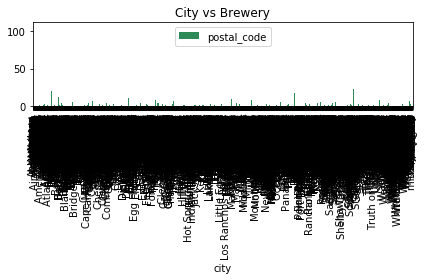

In [107]:
# Configure plot and ticks
number_breweries_index.plot(kind="bar", x="city", y="postal_code", title = "City vs Brewery", color="seagreen")

# Set textual properties
#plt.title("Number of Breweries by City")
#plt.ylabel("Number of Breweries")
#plt.xlabel("City")

# Show plot

plt.savefig("Output/breweries_by_state_db.png")

plt.show
plt.tight_layout()

In [108]:
number_breweries = merge_table.groupby(["city"])[["postal_code"]].count()
number_breweries

,postal_code
city,
Abbottstown,1
Aberdeen,4
Abilene,4
Abingdon,1
Abington,1
Accord,1
Acton,2
Ada,1
Adamstown,2


In [ ]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
median_age = grouped["Median Age"].mean()

median_age = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Median Age": median_age
                      })

median_age.to_csv("Output/median_age_db.csv", index=False, header=True)

median_age

In [ ]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
population = grouped["Population"].mean()

population = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Population": population
                      })

population.to_csv("Output/population_db.csv", index=False, header=True)

population

In [ ]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
income = grouped["Household Income"].mean()

income = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Household Income": income
                      })

income.to_csv("Output/income_db.csv", index=False, header=True)

income